<a href="https://colab.research.google.com/github/gajdam/data-visualization/blob/main/WD_cw7_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
title: Wizualuizacja danych w języku Python </br> Zmiany w czasie
format:
    html:
        embed-resources: true
        include-in-header:
            text: <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>

execute:
    evaluate: true
    echo: true

---

### Biblioteki

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### Dane

In [2]:
np.random.seed(42)

# Zmiany wartości w czasie
okres = 61
data = pd.date_range(start='2024-05-01', periods=okres)
wartosci = np.random.randn(okres, ).cumsum()
dane = pd.DataFrame({'Wartość' : wartosci, 'Data' : data})

# Bilans sprzedaży
miesiace = ['Start', 'Styczeń', 'Luty', 'Marzec', 'Kwiecień', 'Maj', 'Czerwiec', 'Lipiec', 'Bilans']
sprzedaz = pd.Series([0, 244, 354, 287, 159, 234, 345, 456,0])

# Ceny utrzymania nieruchomości (2011)
rok = ['I', 'II','III','IV', 'V', 'VI', 'VII', 'VIII', 'IX', 'X']
y = [205,205.8,206,206.6,205,208,209,210,211,212]

# Punkty Pucharu Narodów w skokach narciarskich w latach 2016-2019
puchar = pd.read_csv("puchar.csv")


## Wykres liniowy


Text(0, 0.5, 'Wartość')

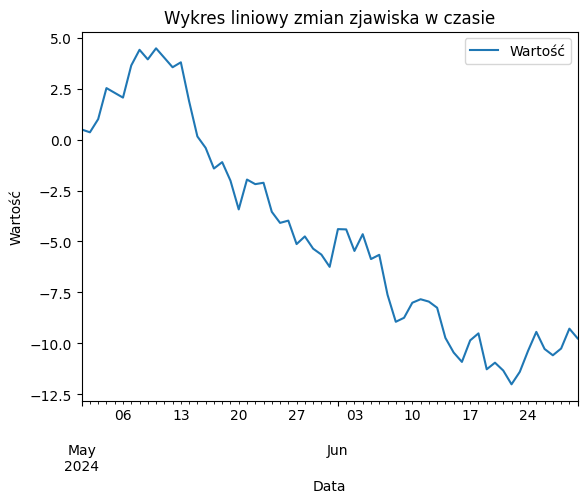

In [16]:
# TODO
dane.plot(x = 'Data', y = "Wartość") # warto tworzyć wykres od razu na ramce danych
plt.title("Wykres liniowy zmian zjawiska w czasie")
plt.xlabel("Data")
plt.ylabel("Wartość")

## Wykres warstwowy (odcięty)

In [29]:
dane.index = dane.Data

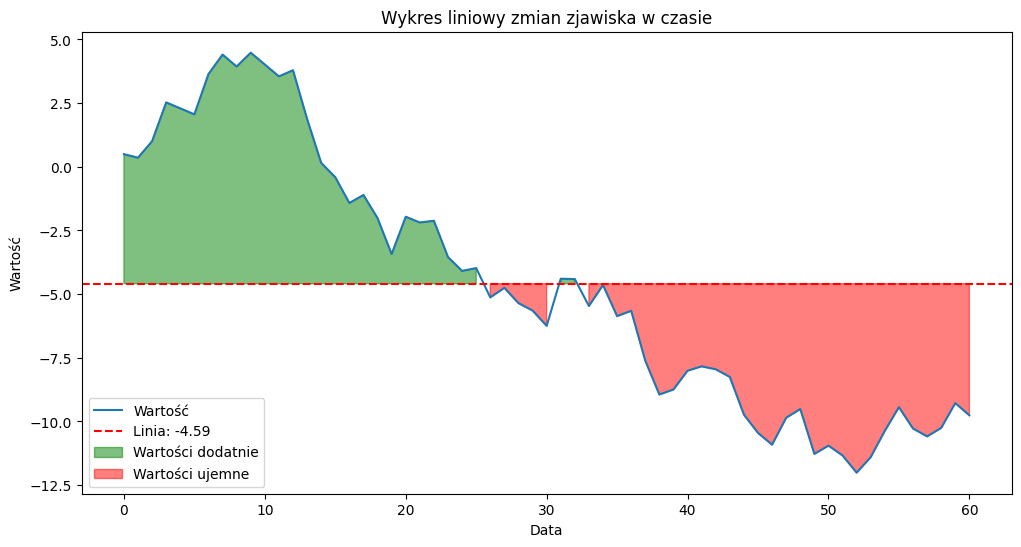

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))

dane.plot(y='Wartość', ax=ax)
ax.set_title('Wykres liniowy zmian zjawiska w czasie')
ax.set_xlabel('Data')
ax.set_ylabel('Wartość');

# Przeanalizuj poniższy kod
# ciecie = 0
ciecie = dane.Wartość.mean()
ax.axhline(y=ciecie, color='r', linestyle='--', label=f'Linia: {ciecie:.2f}')
ax.fill_between(x=dane.index, y1=dane['Wartość'], y2=ciecie, where=dane.Wartość > ciecie, color='green', alpha=0.5, label='Wartości dodatnie') #, interpolate=True
ax.fill_between(x=dane.index, y1=dane['Wartość'], y2=ciecie, where=dane.Wartość <= ciecie, color='red', alpha=0.5, label='Wartości ujemne') #, interpolate=True
ax.legend(loc='lower left');

# Przedstaw wykres zmian zjawiska w czasie, ze wskazaniem wartości wyższych i niższych od średniej
# TODO


### Zadanie

Proszę przygotować wykres przedstawiający zmiany w czasie dla dwóch serii danych. Wykres powinien wyróżniać za pomocą warstwy zmianę dominacji jednej serii nad drugą.

In [22]:
np.random.seed(41)
dane['Inne'] = np.random.randn(okres, ).cumsum()

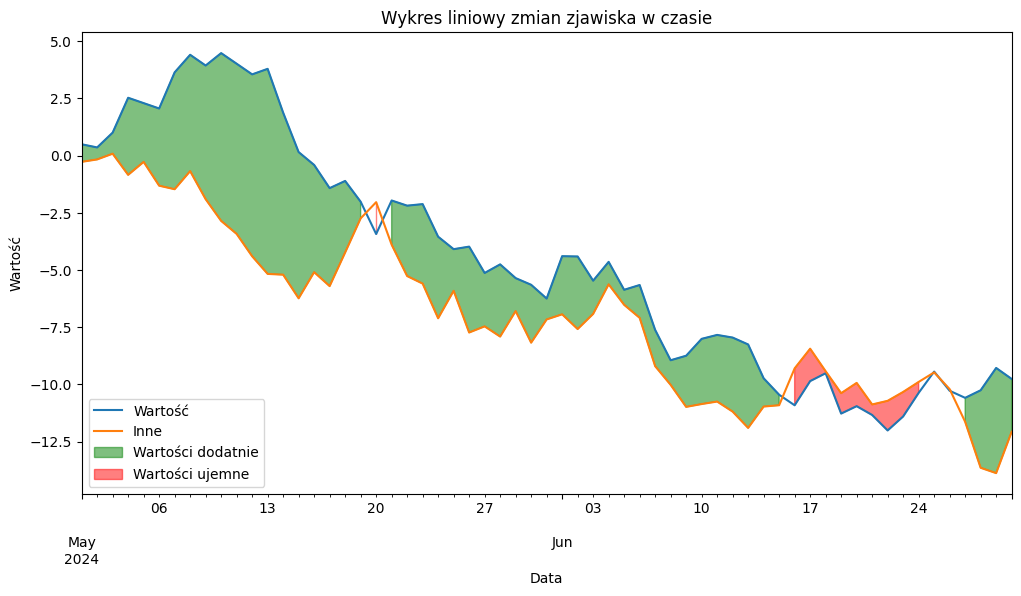

In [32]:
# TODO
fig, ax = plt.subplots(figsize=(12, 6))

dane.plot(y=['Wartość', 'Inne'], ax=ax)
ax.set_title('Wykres liniowy zmian zjawiska w czasie')
ax.set_xlabel('Data')
ax.set_ylabel('Wartość');

ax.fill_between(x=dane.index, y1=dane['Wartość'], y2=dane['Inne'], where=dane.Wartość > dane.Inne, color='green', alpha=0.5, label='Wartości dodatnie') #, interpolate=True
ax.fill_between(x=dane.index, y1=dane['Wartość'], y2=dane['Inne'], where=dane.Wartość <= dane.Inne, color='red', alpha=0.5, label='Wartości ujemne') #, interpolate=True
ax.legend(loc='lower left');

## Wykres kaskadowy

In [47]:
print(miesiace)
sprzedaz = pd.Series([100, 244, 354, 287, 159, 234, 345, 456,0])

print(sprzedaz)

['Start', 'Styczeń', 'Luty', 'Marzec', 'Kwiecień', 'Maj', 'Czerwiec', 'Lipiec', 'Bilans']
0    100
1    244
2    354
3    287
4    159
5    234
6    345
7    456
8      0
dtype: int64


In [37]:
zmiany = sprzedaz.diff().fillna(sprzedaz) # fillna uzupełnia braki wartością oryginalną z serii sprzedaż
print(zmiany)

0      0.0
1    244.0
2    110.0
3    -67.0
4   -128.0
5     75.0
6    111.0
7    111.0
8   -456.0
dtype: float64


In [38]:
fig = go.Figure(go.Waterfall(

    x=miesiace,
    y=zmiany,

    measure= ["absolute"] + ["relative"] * (len(miesiace)-2) + ["total"] ,

    connector={"line":{"color":"rgb(63, 63, 63)", "width": 0.5, "dash":"dot"}},
    increasing={"marker": {"color": "lime"}},
    decreasing={"marker": {"color": "magenta"}},
    totals={"marker": {"color": "skyblue"}}
))

fig.update_layout(
    title="Wykres kaskadowy (z total) – analiza sprzedaży",
    showlegend=False,
    xaxis_title="Miesiące",
    yaxis_title="Spzredaż",
    yaxis_ticksuffix = " zł",
    template = 'simple_white'
)

fig.show()

![](kaskad1.png)

### Zadanie

Proszę przedstwić zmiany w cenach utrzymania nieruchomości (rok 2011), kolejno za pomocą wykresu:

- liniowego
- słupkowego (wertykalnego i horyzontalnego)
- kaskadowego

In [ ]:
print(rok)
print(y)

['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 'X']
[205, 205.8, 206, 206.6, 205, 208, 209, 210, 211, 212]


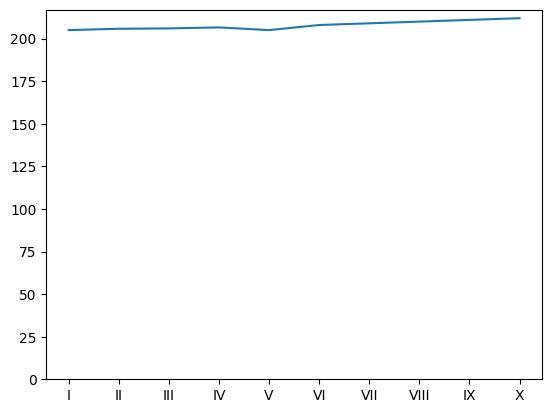

In [70]:
miesiace = ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 'X']
ceny = [205, 205.8, 206, 206.6, 205, 208, 209, 210, 211, 212]

plt.plot(miesiace, ceny)
plt.ylim(0, max(ceny) + 5)
plt.show()

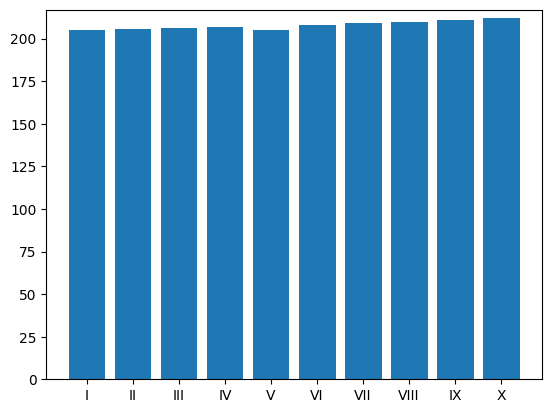

In [79]:
# za pomocą wykresu kolumnowego
# TODO
plt.bar(miesiace, ceny)

plt.ylim(0, max(ceny) + 5)

plt.show()

In [84]:
# za pomocą wykresu kaskadowego
# TODO
zmiany = pd.Series(ceny)
wynik = zmiany.diff().fillna(zmiany)
print(wynik)

fig = go.Figure(go.Waterfall(

    x=miesiace,
    y=wynik,

    measure= ["absolute"] + ["relative"] * (len(miesiace)-2) + ["total"] ,

    connector={"line":{"color":"rgb(63, 63, 63)", "width": 0.5, "dash":"dot"}},
    increasing={"marker": {"color": "lime"}},
    decreasing={"marker": {"color": "magenta"}},
    totals={"marker": {"color": "skyblue"}}
))

fig.update_layout(
    showlegend=False,
    xaxis_title="Miesiące",
    yaxis_title="Spzredaż",
    yaxis_ticksuffix = " zł",
    template = 'simple_white'
)

fig.show()


0    205.0
1      0.8
2      0.2
3      0.6
4     -1.6
5      3.0
6      1.0
7      1.0
8      1.0
9      1.0
dtype: float64


![](kaskad2.png)

## Parallel coordinates (wykres współrzędnych równoległych)

In [ ]:
puchar

,Kraj,Sezon16,Sezon17,Sezon18,Sezon19
0,Norwegia,7202,4415,7149,3943
1,Słowenia,5760,3713,3223,3736
2,Niemcy,5409,5513,5976,5650
3,Austria,4652,5586,3642,4530
4,Japonia,3088,1555,2659,4813
5,Polska,2154,5833,5795,6083
6,Czechy,1881,1029,95,1056


In [ ]:
# Przekształcenie danych do postaci wąskiej
puchar_waska = puchar.melt(id_vars='Kraj',  var_name='Sezon', value_name='Punkty')
puchar_waska['Sezon'] = puchar_waska['Sezon'].str[-2:].astype(int)+2000
puchar['Państwo'] = puchar.index
print(puchar_waska)

        Kraj  Sezon  Punkty
0   Norwegia   2016    7202
1   Słowenia   2016    5760
2     Niemcy   2016    5409
3    Austria   2016    4652
4    Japonia   2016    3088
5     Polska   2016    2154
6     Czechy   2016    1881
7   Norwegia   2017    4415
8   Słowenia   2017    3713
9     Niemcy   2017    5513
10   Austria   2017    5586
11   Japonia   2017    1555
12    Polska   2017    5833
13    Czechy   2017    1029
14  Norwegia   2018    7149
15  Słowenia   2018    3223
16    Niemcy   2018    5976
17   Austria   2018    3642
18   Japonia   2018    2659
19    Polska   2018    5795
20    Czechy   2018      95
21  Norwegia   2019    3943
22  Słowenia   2019    3736
23    Niemcy   2019    5650
24   Austria   2019    4530
25   Japonia   2019    4813
26    Polska   2019    6083
27    Czechy   2019    1056


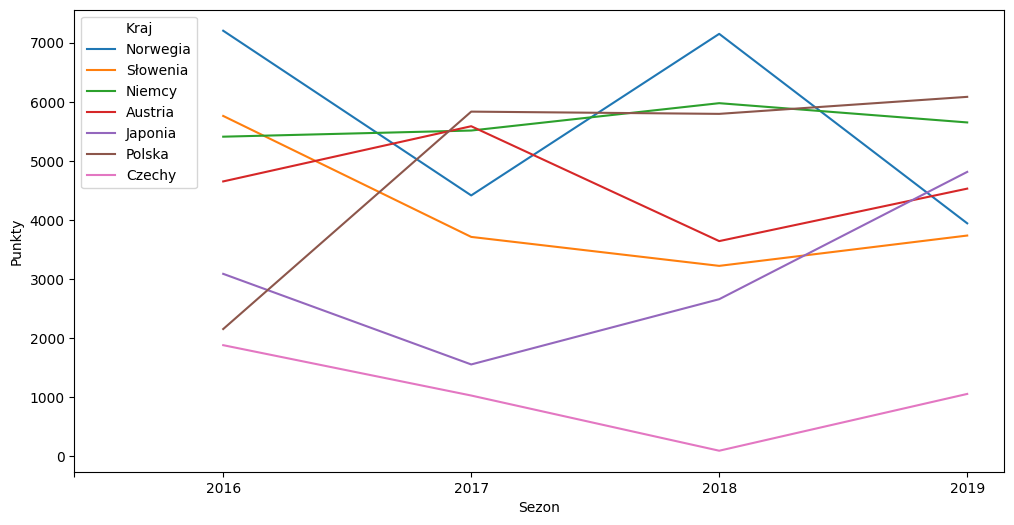

In [ ]:
# Wykres liniowy (spaghetti)

plt.figure(figsize=(12, 6))
sns.lineplot(data = puchar_waska, x='Sezon', y='Punkty', hue='Kraj')
plt.xticks([2015.4]+list(puchar_waska['Sezon'].unique()), [""]+list(puchar_waska['Sezon'].unique()));

In [ ]:
df = px.data.iris()
fig = px.parallel_coordinates(df, color="species_id",
                              dimensions=['sepal_width', 'sepal_length', 'petal_width',
                                          'petal_length'],
                              color_continuous_scale=['red', 'green', 'blue'],
                              color_continuous_midpoint=2)

# fig.update_layout(coloraxis_showscale=False)


fig.show()

![](para_irysy.png)

In [ ]:
fig = px.parallel_coordinates(puchar, color="Państwo",
                              dimensions=['Sezon16', 'Sezon17', 'Sezon18',
                                          'Sezon19'])

fig.show()

![](para_zle.png)

### Zadanie

Proszę przygotować wykres prezentujący zmianę rankingu państw Pucharu Narodów w skokach narciarskich w sezonach 2016-2019 - wykres zmian (*parallel coordinate plot*, *slope plot*)

[01_parallel.html](https://drive.google.com/file/d/1MZdCGWGqXmDkEk_ZvksLmTr95HB8QQiA/view?usp=sharing)


In [ ]:
# TODO



![](para_pol.png)

In [ ]:
# TODO

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = 'deeppink'),
        unselected = dict(line = dict(color = 'gray')),
        dimensions = list([
            dict(label = '2016', values = puchar.Sezon16,
                 tickvals = puchar.Sezon16,
                 ticktext = puchar.Kraj),
            dict(label = '2017', values = puchar.Sezon17,
                 tickvals = puchar.Sezon17,
                 ticktext = [""]*7),
            dict(label = '2018', values = puchar.Sezon18,
                 tickvals = puchar.Sezon18,
                 ticktext = [""]*7),
            dict(label = '2019', values = puchar.Sezon19,
                 tickvals = puchar.Sezon19,
                 ticktext = puchar.Kraj)
        ])
    )
)

fig.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=18
    )
)

fig.show()

![](para_select.png)

## Wykres Sankey (wykres przepływów)

In [ ]:
labels = [
    "Polska", "Niemcy", "Chiny",               # Eksporterzy [0, 1, 2
    "Maszyny", "Żywność", "Elektronika",       # Towary 3, 4, 5
    "Francja", "USA", "Włochy", "Wielka Brytania"  # Importerzy 6, 7, 8, 9]
]

# Połączenia: eksport → towar
source = [0, 0, 1, 1, 2, 2]
target = [3, 4, 3, 5, 5, 4]
values = [10, 5, 15, 7, 20, 8]

# Połączenia: towar → kraj importera
source += [3, 3, 4, 4, 5, 5]
target += [6, 7, 7, 8, 8, 9]
values += [8, 17, 6, 7, 10, 18]

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=["white", "yellow", "red", "dimgray", "orange", "skyblue", "purple", "royalblue", "green", "magenta"]
    ),
    link=dict(
        source=source,
        target=target,
        value=values,
        color="lightgray",
        line=dict(color="black", width=0.5),
    )
)])

fig.update_layout(title_text="Handel międzynarodowy – przepływ towarów eksportowych", font_size=12)
fig.show()

![](sankey.png)